In [1]:
import torch
import torch.nn as nn
from utils.loader import TrainDataset
from torch.utils.data import DataLoader
import utils.notebooks as nb

In [2]:
training_data= TrainDataset("data/train.csv")
train_dataloader = DataLoader(training_data, batch_size=6)

train_features, train_labels = next(iter(train_dataloader))
feat1, label1 = train_features, train_labels
print(f'inputs shape: {feat1.shape}')
print(f'labels shape: {label1.shape}')

inputs shape: torch.Size([6, 1, 512, 512])
labels shape: torch.Size([6, 1, 512, 512])


In [3]:
class Block(nn.Module):
    def __init__(self, in_ch, out_ch):
        super().__init__()
        self.conv1 = nn.Conv2d(in_ch, out_ch, 3)
        self.relu  = nn.ReLU()
        self.conv2 = nn.Conv2d(out_ch, out_ch, 3)
    
    def forward(self, x):
        return self.relu(self.conv2(self.relu(self.conv1(x))))

In [4]:
enc_block = Block(1, 64)
x         = feat1
enc_block(x).shape

torch.Size([6, 64, 508, 508])

In [5]:
class Encoder(nn.Module):
    def __init__(self, chs=(3,64,128,256,512,1024)):
        super().__init__()
        self.enc_blocks = nn.ModuleList([Block(chs[i], chs[i+1]) for i in range(len(chs)-1)])
        self.pool       = nn.MaxPool2d(2)
    
    def forward(self, x):
        ftrs = []
        for block in self.enc_blocks:
            x = block(x)
            ftrs.append(x)
            x = self.pool(x)
        return ftrs


In [6]:
from models import WNet

layers = [8, 16, 32]

first_block = WNet.ConvBlock(1, 8)
x         = first_block(feat1)
x.shape


torch.Size([6, 8, 512, 512])

torch.Size([6, 16, 512, 512])
torch.Size([6, 32, 256, 256])


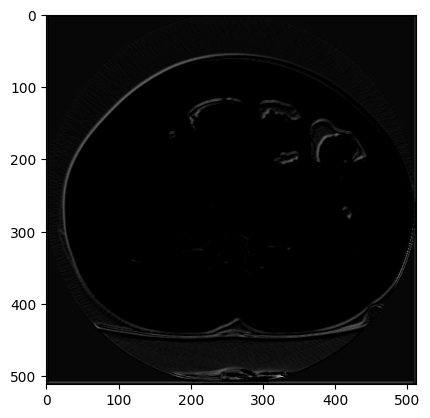

In [7]:
enc_block = WNet.Encoder(layers)
ftrs = enc_block(x)
for ftr in ftrs: print(ftr.shape)
nb.show_img(ftrs[0][0])

In [8]:
dec_block = WNet.Decoder(layers.reverse())

TypeError: object of type 'NoneType' has no len()